In [1]:
!git clone https://github.com/BeyundBirthday/CoronaHack--Chest-X-Ray.git

Cloning into 'CoronaHack--Chest-X-Ray'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 12 (delta 0), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), done.


In [1]:
# !unzip '/content/CoronaHack--Chest-X-Ray/archive(1).zip' -d '/content/chest-xray/'

In [3]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import cv2
import os
import shutil
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, models, transforms, utils
from torchvision.transforms import v2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models
from torchvision.datasets import ImageFolder
import random
import torchsummary
from PIL import Image
from pathlib import Path
import pandas as pd
import numpy as np


# Handling images
from PIL import Image
import matplotlib.pyplot as plt

# Handling paths

import time

# Pytorch essentials
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torchvision import models
from torchvision.datasets import ImageFolder
import torchsummary



# Pytorch essentials for datasets.
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Pytorch way of data augmentation.
import torchvision
from torchvision import datasets, models, transforms, utils
from torchvision.transforms import v2

import cv2
import os
from glob import glob
from tqdm import tqdm
import shutil
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
df = pd.read_csv('/content/chest-xray/Chest_xray_Corona_Metadata.csv')

In [5]:
df

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [6]:
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df.head()

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


<Axes: xlabel='Label', ylabel='count'>

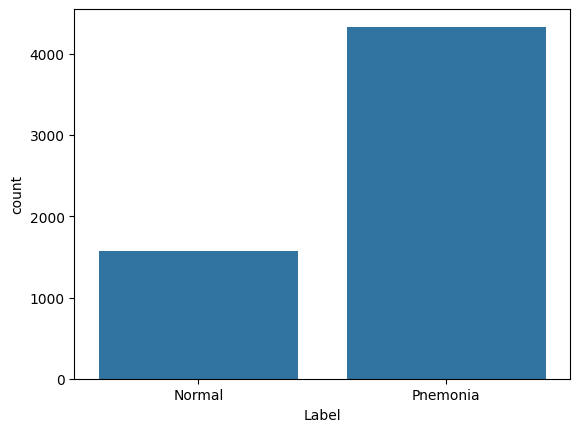

In [8]:
sns.countplot(x = df['Label'])

In [9]:
len(df[df['Dataset_type']=='TRAIN']),len(df[df['Dataset_type']=='TEST'])


(5286, 624)

In [10]:
data_path = Path('/content/chest-xray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset')
train_folder_path = Path('/content/chest-xray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train')
test_folder_path = Path('/content/chest-xray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test')

In [11]:
for dirpath, dirnames, filenames in os.walk(data_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/chest-xray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset'.
There are 0 directories and 624 images in '/content/chest-xray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'.
There are 0 directories and 5309 images in '/content/chest-xray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'.


In [12]:
img_path_list = list(data_path.glob('*/*.jpeg'))

In [13]:
ran_img = random.sample(img_path_list, 20)

In [14]:
filenames = [path.name for path in ran_img]

In [15]:
filenames

['person1129_virus_1857.jpeg',
 'person377_bacteria_1717.jpeg',
 'NORMAL2-IM-1174-0001.jpeg',
 'NORMAL2-IM-0035-0001.jpeg',
 'IM-0278-0001.jpeg',
 'NORMAL2-IM-0903-0001.jpeg',
 'person392_bacteria_1786.jpeg',
 'person733_bacteria_2635.jpeg',
 'person475_bacteria_2020.jpeg',
 'person1253_virus_2129.jpeg',
 'NORMAL2-IM-0804-0001.jpeg',
 'person1252_virus_2124.jpeg',
 'person1031_bacteria_2963.jpeg',
 'IM-0347-0001.jpeg',
 '5083A6B7-8983-472E-A427-570A3E03DDEE.jpeg',
 'person56_virus_112.jpeg',
 'person51_bacteria_247.jpeg',
 'person579_bacteria_2384.jpeg',
 'person537_virus_1067.jpeg',
 'person547_bacteria_2292.jpeg']

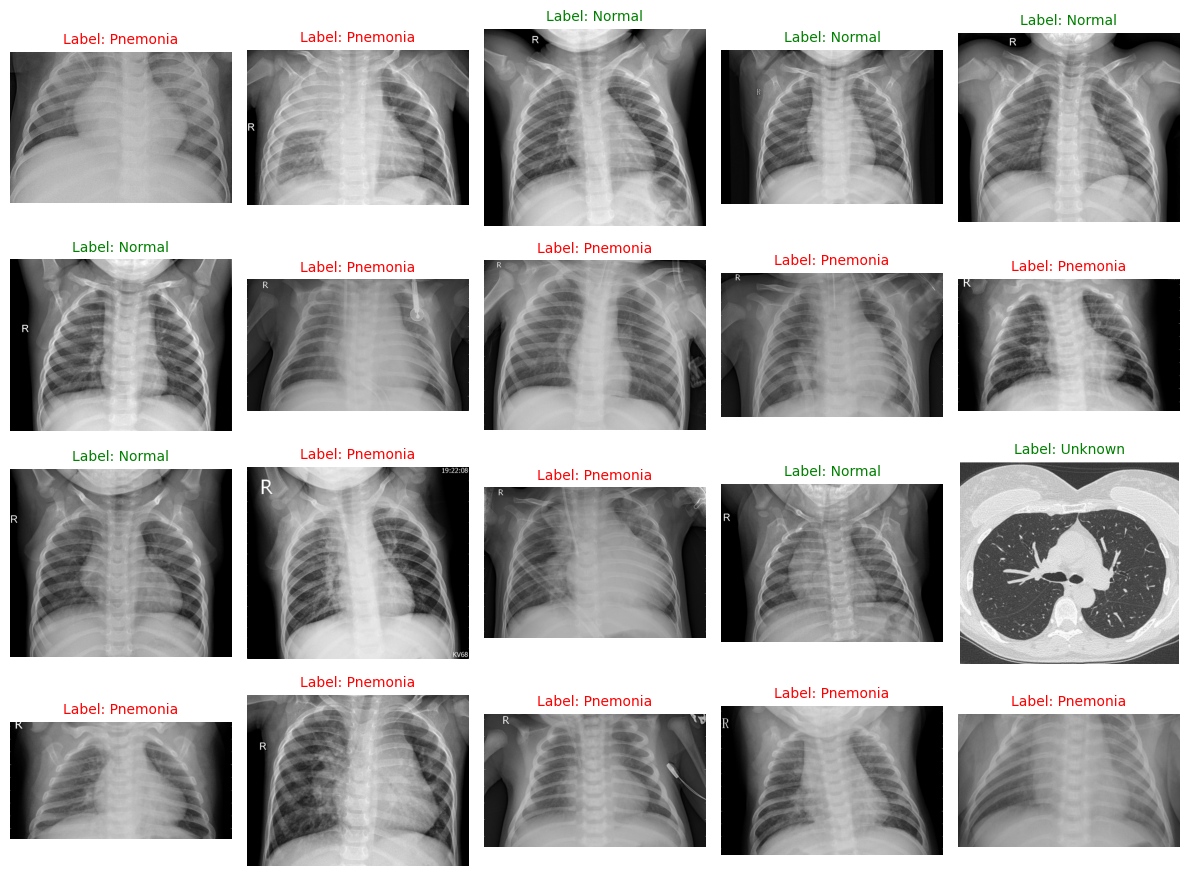

In [16]:
img_filenames = [img_path.name for img_path in ran_img]
labels = df[df["X_ray_image_name"].isin(img_filenames)][["X_ray_image_name", "Label"]].set_index("X_ray_image_name").to_dict()["Label"]

fig, axes = plt.subplots(4, 5, figsize=(12,9))

for ax, img_path in zip(axes.flatten(), ran_img):
    img = plt.imread(img_path)
    ax.imshow(img, cmap="gray")
    ax.set_title(f"Label: {labels.get(img_path.name, 'Unknown')}", fontsize=10,
                 color = 'red' if labels.get(img_path.name, 'Unknown') == 'Pnemonia' else 'green')
    ax.axis("off")

plt.tight_layout()
plt.show()


In [17]:
class ChestXRayDataset(Dataset):
    def __init__(self, img_dir, csv_path, transform=None,dataset_type="train"):
        """
        Args:
            img_dir (str): Path to the directory containing images.
            csv_path (str): Path to the CSV file with labels.
            transform (torchvision.transforms): Image transformations.
        """
        # Load the CSV file
        self.df = pd.read_csv(csv_path)
        self.df = self.df[self.df["Dataset_type"] == dataset_type]
        # Store image directory path
        self.img_dir = img_dir

        # Image transformations
        self.transform = transform

    def __len__(self):
      return len(self.df)


    def __getitem__(self,idx):
        img_name = self.df.iloc[idx]["X_ray_image_name"]
        label = self.df.iloc[idx]["Label"]

        img_path = self.img_dir / img_name
        image = Image.open(img_path).convert("RGB")

        label_dict = {"Normal": 0, "Pnemonia": 1}
        label = label_dict.get(label, -1)

        if self.transform:
            image = self.transform(image)

        return image, label





In [18]:
df.iloc[0]["X_ray_image_name"]

'IM-0128-0001.jpeg'

In [19]:

train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(size=(224, 224), antialias=True),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomAffine(degrees=(-10, 10), translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float32),
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float32),
])


In [20]:
train_dataset  = ChestXRayDataset(img_dir=Path("/content/chest-xray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train"),
                           csv_path="/content/chest-xray/Chest_xray_Corona_Metadata.csv",
                           transform=train_transforms,dataset_type="TRAIN")

test_dataset  = ChestXRayDataset(img_dir=Path("/content/chest-xray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test"),
                           csv_path="/content/chest-xray/Chest_xray_Corona_Metadata.csv",
                           transform=test_transforms,dataset_type="TEST")

In [21]:
train_dataset[0]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 0)

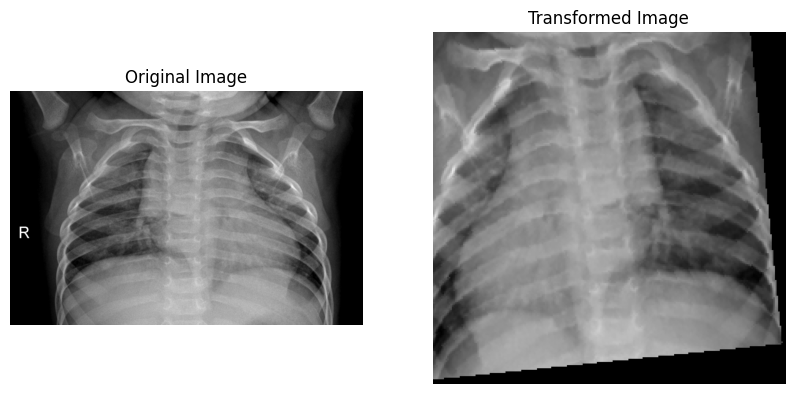

In [22]:
import matplotlib.pyplot as plt
import torch

# Get a sample image
idx = 0
img_name = train_dataset.df.iloc[idx]["X_ray_image_name"]
img_path = train_dataset.img_dir / img_name

# Load the original image
original_image = Image.open(img_path).convert("RGB")

# Apply transformation
transformed_image = train_transforms(original_image)

# Convert transformed image back to numpy for visualization
transformed_image_np = transformed_image.permute(1, 2, 0).numpy()  # Convert CHW -> HWC

# Plot original and transformed images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original Image
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Transformed Image
axes[1].imshow(transformed_image_np)
axes[1].set_title("Transformed Image")
axes[1].axis("off")

plt.show()


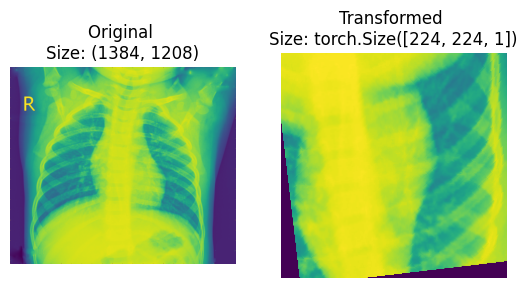

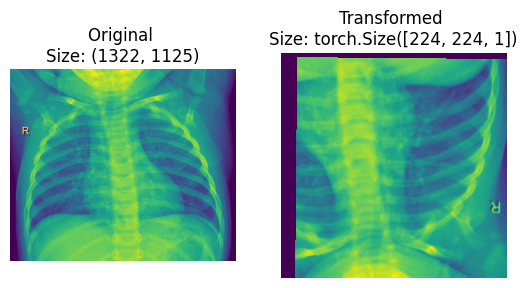

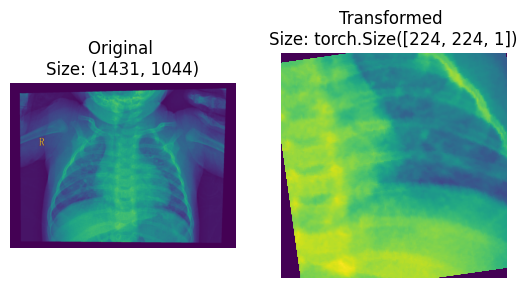

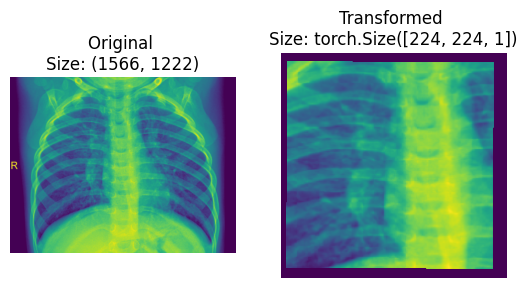

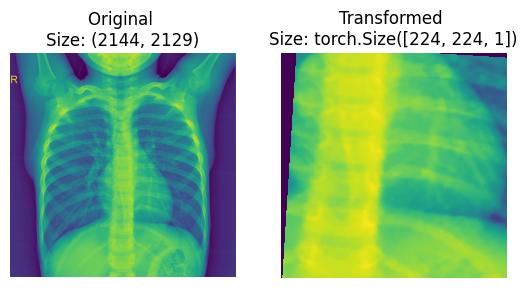

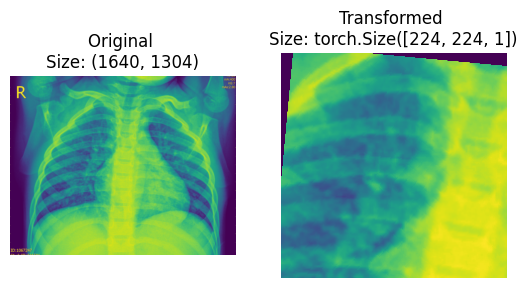

In [23]:
random_image_paths = random.sample(img_path_list, k=6)
for image_path in random_image_paths:
    with Image.open(image_path) as f:
        fig, ax = plt.subplots(1, 2)
        ax[0].imshow(f)
        ax[0].set_title(f"Original \nSize: {f.size}")
        ax[0].axis("off")

        transformed_image = train_transforms(f).permute(1, 2, 0)
        ax[1].imshow(transformed_image)
        ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
        ax[1].axis("off")

In [24]:
BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [25]:
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
class_size = 2
# model = models.efficientnet_v2_m(weights=models.EfficientNet_V2_M_Weights.DEFAULT)
model = models.efficientnet_v2_s(weights='DEFAULT')
# model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
model.classifier[1] = torch.nn.Linear(1280, class_size)
model(torch.randn((16,3,224,224))).shape

Downloading: "https://download.pytorch.org/models/efficientnet_v2_s-dd5fe13b.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_s-dd5fe13b.pth
100%|██████████| 82.7M/82.7M [00:00<00:00, 191MB/s]


torch.Size([16, 2])

In [26]:
def train(dataloader, model, loss_fn, optimizer, lr_scheduler):
    size = len(dataloader.dataset) # number of samples
    num_batches = len(dataloader) # batches per epoch
    model.train()
    epoch_loss = 0.0
    epoch_correct = 0
    for (data_,target_) in dataloader:
        target_ = target_.type(torch.LongTensor)
        data_, target_ = data_.to(device), target_.to(device)

        # First we'll clean the cache of optimizer
        optimizer.zero_grad()

        # Forward propagation
        outputs = model(data_)

        # Computing loss
        loss = criterion(outputs,target_)

        # Backward propagation
        loss.backward()

        # Optimizing model
        optimizer.step()

        # Computing statistics.
        epoch_loss = epoch_loss + loss.item()
        _,pred = torch.max(outputs,dim=1)
        epoch_correct = epoch_correct + torch.sum(pred == target_).item()
    lr_scheduler.step()
    return epoch_correct/size, epoch_loss/num_batches


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset) # number of samples
    num_batches = len(dataloader) # batches per epoch
    epoch_loss = 0.0
    epoch_correct = 0
    with torch.no_grad():
        # This will disable backward propagation
        model.eval()
        for (data_,target_) in dataloader:
            target_ = target_.type(torch.LongTensor)
            data_, target_ = data_.to(device), target_.to(device)

            # Forward propagation
            outputs = model(data_)

            # Computing loss
            loss = criterion(outputs,target_)
            # Computing statistics.
            epoch_loss = epoch_loss + loss.item()
            _,pred = torch.max(outputs,dim=1)
            epoch_correct = epoch_correct + torch.sum(pred == target_).item()
    return  epoch_correct/size, epoch_loss/num_batches

In [ ]:
model.to(device)
EPOCHS = 20

logs = {
    'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []
}

criterion  = nn.CrossEntropyLoss()


# Optimizer which will use gradients to train model.
learning_rate = 0.0001
momentum = 0.9
weight_decay = 0.1
# optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=weight_decay, amsgrad=False)
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)
lr_milestones = [7, 14, 21, 28, 35]
multi_step_lr_scheduler = lr_scheduler.MultiStepLR(optimizer, milestones=lr_milestones, gamma=0.1)

# Earlystopping
patience = 5
counter = 0
best_loss = np.inf

for epoch in tqdm(range(EPOCHS)):
    train_acc, train_loss,  = train(train_loader, model, criterion, optimizer, multi_step_lr_scheduler)
    val_acc, val_loss = test(test_loader, model, criterion)
    print(f'EPOCH: {epoch} \
    train_loss: {train_loss:.4f}, train_acc: {train_acc:.3f} \
    val_loss: {val_loss:.4f}, val_acc: {val_acc:.3f} \
    Learning Rate: {optimizer.param_groups[0]["lr"]}')

    logs['train_loss'].append(train_loss)
    logs['train_acc'].append(train_acc)
    logs['val_loss'].append(val_loss)
    logs['val_acc'].append(val_acc)
    torch.save(model.state_dict(), "last.pth")
    if val_loss < best_loss:
        counter = 0
        best_loss = val_loss
        torch.save(model.state_dict(), "best.pth")
    else:
        counter += 1
    if counter >= patience:
        print("Earlystop!")
        break



  0%|          | 0/20 [00:00<?, ?it/s]

EPOCH: 0     train_loss: 0.2619, train_acc: 0.892     val_loss: 0.2374, val_acc: 0.923     Learning Rate: 0.0001


  5%|▌         | 1/20 [02:53<54:59, 173.65s/it]

In [ ]:
train_loader.dataset

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(logs['train_loss'],label='Train_Loss')
plt.plot(logs['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(logs['train_acc'],label='Train_Accuracy')
plt.plot(logs['val_acc'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()